plydata是一个提供数据处理语法的Python库，借鉴了R语言dplyr，tidyr和forcats等包中的管道操作符。 

plydata使用 ``>>运算符`` 作为管道符号，或者使用``ply（data，* verbs）``函数代替 ``>>``， 目前仅支持对pandas.DataFrame数据进行操作。

**安装**

```
pip install plydata
```

# 快速上手

In [2]:
import pandas as pd
from plydata import define, query, if_else, ply


df = pd.DataFrame({
    'x': [0, 1, 2, 3],
    'y': ['zero', 'one', 'two', 'three']})

df

x      y
0  0   zero
1  1    one
2  2    two
3  3  three

## define
define函数名很简单，定义变量或者操作变量。

``define(data, *args,**kwargs)``
- data 待操作的dataframe数据
- args、kwargs 操作过程及结果。

比如我们想在df中新建一个z列，z列的值完全复制自x列。可以使用代码 define(df, z='x')

In [12]:
define(df, z='x')

x      y  z
0  0   zero  0
1  1    one  1
2  2    two  2
3  3  three  3

**注意:** df中有x列，所以这里的使用的'x',而不是x。

## >>管道符
刚刚的问题可以使用管道符实现与define(df, z='x')相同的功能。

In [14]:
#等同于df['z']=df['x']
#等同于define(df, z='x')
df >> define(z='x')

x      y  z
0  0   zero  0
1  1    one  1
2  2    two  2
3  3  three  3

如果有多个环节，可以用括号包裹住，环节与环节用``>>``和``换行``前后衔接。

比如我们有多个操作，每一步操作如下
1. ``m=2x``
2. ``n=m*m``
3. ``q=m+n``

In [27]:
(df 
 >> define(m='2*x') 
 >> define(n='m*m') 
 >> define(q='m+n')
)

x      y  m   n   q
0  0   zero  0   0   0
1  1    one  2   4   6
2  2    two  4  16  20
3  3  three  6  36  42

上面所有的plydata相关操作不会修改原始数据df

In [15]:
df

x      y
0  0   zero
1  1    one
2  2    two
3  3  three

## if_else
在df中新建z列，z的值满足
- 当x大于1，z为1
- 当x小于等于1， z为0

使用if_else(predicate, true_value, false_value)
- predicate 逻辑判断条件字符串
- true_value 满足逻辑条件返回的值
- false_value 不满足逻辑条件返回的值

In [16]:
#等同于define(df, z=if_else('x>1', 1, 0))
df >> define(z=if_else('x>1', 1, 0))

x      y  z
0  0   zero  0
1  1    one  0
2  2    two  1
3  3  three  1

## query
query(data, expr)
- data 待查询的dataframe数据
- expr  查询条件字符串

In [33]:
(df 
 >> define(z=if_else('x>1', 1, 0)) 
 >> query('z==1')
)

x  z
80   1.007324  1
81   1.019916  1
82   1.032507  1
83   1.045099  1
84   1.057691  1
..        ... ..
495  6.232819  1
496  6.245411  1
497  6.258002  1
498  6.270594  1
499  6.283185  1

[420 rows x 2 columns]

## ply()
ply功能等同于管道符>>， 刚刚上面的代码

```python
(df 
 >> define(z=if_else('x>1', 1, 0)) 
 >> query('z==1')
)
```

可以用ply

In [29]:
ply(df,
    define(z=if_else('x > 1', 1, 0)),
    query('z == 1')
)

x      y  z
2  2    two  1
3  3  three  1

# plydata与plotnine
在R语言中，用ggplot2作图经常会用到管道符。而在Python中，plydata提供管道符，可以与作图库plotnine结合使用。


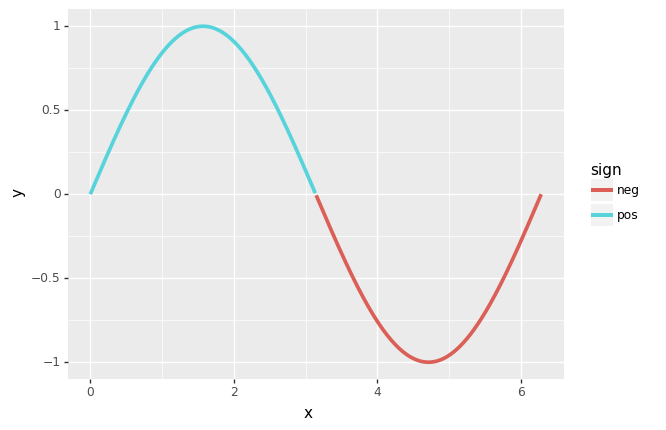

<ggplot: (330618305)>

In [41]:
from plotnine import ggplot, geom_line, aes
from plydata import define, if_else
import numpy as np


df = pd.DataFrame({'x': np.linspace(0, 2*np.pi, 500)})
(df 
 >> define(y='np.sin(x)') 
 >> define(sign=if_else('y>=0', '"pos"', '"neg"')) 
 >> (ggplot(aes(x='x', 
                y='y', 
                color='sign'))+
     geom_line(size=1.5))
)